### Cella usa e getta (ogni volta che re-inizializzi il kernel)

In [17]:
# libraries
import os
import sys
import platform
print(sys.version)

strong_pc = platform.system() == 'Linux'
in_colab = 'google.colab' in sys.modules
if in_colab:
    if not os.getcwd().split('/')[-1].split('_')[-1]=='2023':
        from google.colab import drive
        drive.mount('/content/drive')
        os.chdir(r'/content/drive/MyDrive/Human_Data_Analytics_Project_2023')

    !pip install tensorflow==2.11.0
    !pip install tensorflow_text==2.11.0
    if not 'tensorflow_io' in sys.modules:
        print('Installing tensorflow-IO')
        !pip install tensorflow-io
    if not 'keras' in sys.modules and False:
        print('Installing keras')
        !pip install keras==2.11.0
    if not 'scikeras' in sys.modules:
        print('Installing scikeras')
        !pip install scikeras[tensorflow]
    if not 'keras-tuner' in sys.modules:
        print('installing keras tuner')
        !pip install keras-tuner
        !pip install numba==0.57.0


if 'DEEPNOTE_ENV' in os.environ:
    os.chdir('/..')
    os.chdir('datasets')
    os.chdir('googledrivedeepnoteintegration')
    os.chdir('Human_Data_Analytics_Project_2023')
    if not 'librosa' in sys.modules:
        print('Installing Librosa')
        !pip install librosa
    if not 'scikeras' in sys.modules:
        print('Installing scikeras')
        !pip install scikeras[tensorflow]
    if not 'keras-tuner' in sys.modules:
        print('installing keras tuner')
        !pip install keras-tuner
        !pip install numba==0.57.0

main_dir = os.getcwd()
if main_dir not in sys.path:
    print('Adding the folder for the modules')
    sys.path.append(main_dir)

#BASE LIBRARIES
import numpy as np
import pandas as pd
import h5py
import shutil
import time
import random
import subprocess
import itertools
import warnings
import pickle
import json

#PLOT LIBRARIES
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set(style="white", palette="muted")
import IPython.display as ipd
#import plotly.express as px

#AUDIO LIBRARIES
import librosa
from scipy.io import wavfile
from scipy import signal
from scipy.fft import fft,ifft,fftfreq, fftshift
from scipy.signal import stft,spectrogram,periodogram
#from pydub import AudioSegment

#MACHINE LEARNING LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, LeaveOneOut, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.utils import check_random_state
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras.models import load_model

# GPU SETTINGS FOR LINUX and repressing warnings for windows. References for gpu: https://www.tensorflow.org/guide/gpu
show_gpu_activity = False
if sys.platform == 'linux' and not in_colab:
    if show_gpu_activity:
        tf.debugging.set_log_device_placement(True)

    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
    # Restrict TensorFlow to only allocate a part of memory on the first GPU
        try:
            tf.config.set_logical_device_configuration(
                gpus[0],
                [tf.config.LogicalDeviceConfiguration(memory_limit=6800)])
            logical_gpus = tf.config.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            # Virtual devices must be set before GPUs have been initialized
            print(e)
else:
    warnings.filterwarnings("ignore", category=UserWarning)
    
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import plot_model as tf_plot
if in_colab:
    import tensorflow_io as tfio
print("TensorFlow version:", tf.__version__)
# show keras version
import keras
print(f'keras version = {keras.__version__}')
#import keras_tune as kt
from keras import layers
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.regularizers import L1L2
# kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4) # we may use this in some layers...

#RANDOM SETTINGS
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
check_random_state(seed)

#EVALUATION LIBRAIRES
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve
from sklearn.metrics import make_scorer
from sklearn.metrics import RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import precision_recall_fscore_support, auc

#OUR PERSONAL FUNCTIONS
import importlib
from Preprocessing.data_loader import download_dataset,load_metadata
from Preprocessing.exploration_plots import one_random_audio, plot_clip_overview, Spectral_Analysis
from Models.basic_ml import basic_ML_experiments, basic_ML_experiments_gridsearch, build_dataset, extract_flatten_MFCC
from Visualization.model_plot import confusion_matrix,listen_to_wrong_audio

importlib.reload(importlib.import_module('Preprocessing.data_loader'))
importlib.reload(importlib.import_module('Models.basic_ml'))
importlib.reload(importlib.import_module('Visualization.model_plot'))

from Preprocessing.data_loader import load_metadata
df_ESC10, df_ESC50 = load_metadata(main_dir,heads = False, ESC_US = False, statistics=False)

from Preprocessing.data_loader import load_metadata
from Models.basic_ml import basic_ML_experiments, basic_ML_experiments_gridsearch, build_dataset, extract_flatten_MFCC

importlib.reload(importlib.import_module('Models.ann_utils'))
importlib.reload(importlib.import_module('Visualization.model_plot'))

from Models.ann_utils import *
from Models.ann_utils import MFCCWithDeltaLayer,OutputCutterLayer
from Visualization.model_plot import plot_history, confusion_matrix, listen_to_wrong_audio, visualize_the_weights

ESC10_path = os.path.join(main_dir,'Data', 'ESC-10-depth')
samplerate = 44100

3.10.9 (main, Jan 11 2023, 15:21:40) [GCC 11.2.0]
1 Physical GPUs, 1 Logical GPUs
TensorFlow version: 2.11.1
keras version = 2.11.0


2023-08-30 11:03:27.038409: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:27.039163: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:27.039918: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:27.040499: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


# 4 ENCODER FOR HIGH-LEVEL FEATURE EXTRACTION

In [18]:
import importlib
importlib.reload(importlib.import_module('Models.ann_utils'))
importlib.reload(importlib.import_module('Visualization.model_plot'))
importlib.reload(importlib.import_module('Preprocessing.data_loader'))
from Models.ann_utils import *
from Preprocessing.data_loader import reshape_US
from Visualization.model_plot import *

## 4.1 Classification on encoded raw audio

Since neither the basic machine learning appraches nor the dense feed forward NNs were able to achieve a good accuracy, we decided to use only the RNN approach, which at least achived alone 28% of accurcy on the 10 class classification problem from raw audio.

### Create the dataset

2023-08-30 11:03:29.185575: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:29.188501: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:29.190104: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:29.195569: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:29.196658: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:29.197756: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:29.198410: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:29.205068: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:29.205803: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:29

The max value is 0.99884033203125
Audio shape: (80, 220500, 1)
Label shape: (80, 10)
Label: dog


2023-08-30 11:03:29.418558: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


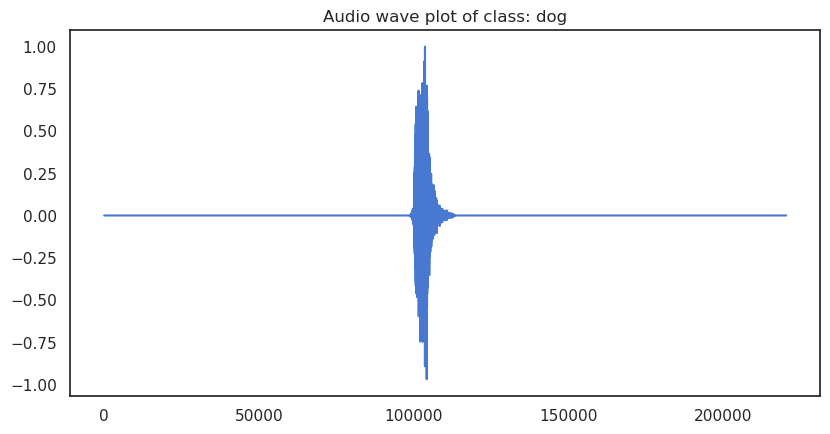

In [19]:
batch_size = 30 if not strong_pc else 80

dataset, label = create_dataset_lite(df_ESC10,
                                     batch_size = batch_size,
                                     ndim = 2)
INPUT_DIM, n_labels = example_batch(dataset, label_names = list(label.columns), verbose = 1)

### Load the encoder and build the model

In [20]:
AE_name = 'Dense_AE_ffnn'
path_to_AE = os.path.join(main_dir, 'Saved_Models', AE_name)

#import the autencoder
autoencoder = load_model(path_to_AE)
encoder = autoencoder.layers[1]

# freeze the encoder
encoder.trainable = False
encoder.summary()

Classifier_name = 'encoder_classifier_raw'


2023-08-30 11:03:31.083606: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:31.084260: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:31.090457: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:31.093498: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:31.094631: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:31.095420: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:31.096212: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:31.097034: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:31.097826: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:31

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 220500)            0         
                                                                 
 dense_18 (Dense)            (None, 64)                14112064  
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)               

In [21]:
def build_model(
    encoder = encoder,
    n_labels = n_labels,
    INPUT_DIM = INPUT_DIM,
    n_units = 8,
    activation = 'tanh',
    #arguments to compile the model
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    learning_rate = 1e-3,
    metrics = ['accuracy'],
    verbose = 0,
    compile = True,
    name = Classifier_name
):

    classifier = tf.keras.Sequential([
        tf.keras.layers.GRU(units=n_units, activation=activation),
        tf.keras.layers.Dense(n_labels, activation='softmax')
    ], name = 'Classifier')

    # build the model with keras.Model
    inp = tf.keras.Input(shape = INPUT_DIM)
    code = encoder(inp)
    # add 1 dimension to the code
    code = tf.expand_dims(code, axis = 2)
    output = classifier(code)
    model = tf.keras.Model(inputs=inp, outputs=output, name = Classifier_name)

    # compile the autoencoder
    lr = learning_rate
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr) if sys.platform == 'darwin' or in_colab else tf.keras.optimizers.Adam(learning_rate = lr)

    if compile:
        # compile the model
        model.compile(loss = loss,
                      optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate) if sys.platform == 'darwin' or in_colab else tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      metrics = metrics)
        if verbose > 0:
            model.summary()

    return model

In [22]:
model = build_model()
model.summary()

2023-08-30 11:03:33.592489: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:33.593893: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:33.596328: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:33.598200: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:33.600117: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:33.601226: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:33.602767: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:33.604772: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:33.606515: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:03:33

Model: "encoder_classifier_raw"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 220500, 1)]       0         
                                                                 
 sequential_6 (Sequential)   (None, 16)                14114944  
                                                                 
 tf.expand_dims_13 (TFOpLamb  (None, 16, 1)            0         
 da)                                                             
                                                                 
 Classifier (Sequential)     (None, 10)                354       
                                                                 
Total params: 14,115,298
Trainable params: 354
Non-trainable params: 14,114,944
_________________________________________________________________


### Run a Grid Search to find the best hyperparameters

In [23]:
strong_pc = True

In [25]:
#params = {'learning_rate':[1e-3, 1e-4]}
params = {'learning_rate':[1e-2, 1e-3, 1e-4],'n_units':[8,32,128],'activation':['relu','elu','tanh']}
epochs = 1 if not strong_pc else 100
patience = 10
verbose = 0
K_fold = 5
model_cv, result, best_params = K_fold_training(dataset,
                                                build_model,
                                                params = params,
                                                epochs = epochs,
                                                patience = patience,
                                                verbose = verbose,
                                                K=K_fold)


(400, 220500, 1)
(400, 10)


2023-08-30 11:04:41.084522: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:04:41.089782: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:04:41.216084: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:04:41.222751: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:04:41.226215: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:04:41.229574: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:04:42.098774: I te

accuracy on test for this fold is 0.2


2023-08-30 11:04:53.214041: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:04:53.218546: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:04:53.312819: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:04:53.318615: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:04:53.321773: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:04:53.324703: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:04:53.957817: I te

accuracy on test for this fold is 0.2


2023-08-30 11:05:04.351678: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:04.356633: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:04.467927: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:04.473869: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:04.477053: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:04.480014: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:05:05.110196: I te

accuracy on test for this fold is 0.175


2023-08-30 11:05:15.041709: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:15.046219: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:15.199887: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:15.205825: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:15.208950: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:15.211881: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:05:15.839591: I te

accuracy on test for this fold is 0.1375


2023-08-30 11:05:26.990209: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:26.995021: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:27.108930: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:27.114599: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:27.117698: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:27.120605: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:05:27.743259: I te

accuracy on test for this fold is 0.225


2023-08-30 11:05:35.389466: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:35.390170: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:35.392606: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:35.393223: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:35.394111: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:35.394653: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:35.429378: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:35.429977: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:35.645599: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:35

accuracy on test for this fold is 0.1875


2023-08-30 11:05:49.420931: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:49.426284: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:49.562442: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:49.570268: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:49.574993: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:49.578403: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:05:50.192971: I te

accuracy on test for this fold is 0.2


2023-08-30 11:05:59.318003: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:59.323808: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:59.483297: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:59.489025: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:59.492190: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:05:59.495531: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:06:00.134139: I te

accuracy on test for this fold is 0.15


2023-08-30 11:06:10.207138: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:10.211925: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:10.382689: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:10.388521: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:10.391700: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:10.394667: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:06:11.032741: I te

accuracy on test for this fold is 0.1375


2023-08-30 11:06:19.716788: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:19.721594: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:19.831602: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:19.837609: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:19.840764: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:19.843682: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:06:20.465476: I te

accuracy on test for this fold is 0.2125


2023-08-30 11:06:37.054912: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:37.055630: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:37.064517: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:37.065425: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:37.066994: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:37.067641: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:37.102806: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:37.103386: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:37.291035: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:37

accuracy on test for this fold is 0.1875


2023-08-30 11:06:54.755867: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:54.760771: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:54.837153: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:54.843161: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:54.846587: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:06:54.849649: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:06:55.508826: I te

accuracy on test for this fold is 0.1875


2023-08-30 11:07:06.134107: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:07:06.138963: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:07:06.721180: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:07:06.727087: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:07:06.730297: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:07:06.733335: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:07:07.363231: I te

accuracy on test for this fold is 0.2125


2023-08-30 11:07:26.383110: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:07:26.390388: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:07:26.542610: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:07:26.548956: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:07:26.552289: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:07:26.555439: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:07:27.215181: I te

accuracy on test for this fold is 0.1625


2023-08-30 11:07:46.436422: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:07:46.441472: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:07:46.630930: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:07:46.636680: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:07:46.640065: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:07:46.643208: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:07:47.274003: I te

accuracy on test for this fold is 0.2375


2023-08-30 11:08:03.368947: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:03.373547: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:03.518904: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:03.524686: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:03.527819: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:03.530803: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:08:04.187331: I te

accuracy on test for this fold is 0.1625


2023-08-30 11:08:24.430145: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:24.435222: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:24.553718: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:24.559642: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:24.562833: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:24.565808: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:08:25.191802: I te

accuracy on test for this fold is 0.175


2023-08-30 11:08:37.091401: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:37.095972: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:37.229975: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:37.236034: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:37.239288: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:37.242242: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:08:37.870101: I te

accuracy on test for this fold is 0.1875


2023-08-30 11:08:56.382214: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:56.387118: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:56.485166: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:56.491437: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:56.494616: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:08:56.497770: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:08:57.134582: I te

accuracy on test for this fold is 0.1


2023-08-30 11:09:04.384104: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:04.388937: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:04.507145: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:04.513062: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:04.516280: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:04.519312: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:09:05.144949: I te

accuracy on test for this fold is 0.1


2023-08-30 11:09:10.299131: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:10.303711: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:10.422936: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:10.428761: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:10.431887: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:10.434841: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:09:11.048225: I te

accuracy on test for this fold is 0.1875


2023-08-30 11:09:24.701422: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:24.706219: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:24.837610: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:24.843922: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:24.847310: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:24.850345: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:09:25.502954: I te

accuracy on test for this fold is 0.175


2023-08-30 11:09:46.018772: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:46.025886: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:46.162074: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:46.167828: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:46.170978: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:09:46.173931: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:09:47.485094: I te

accuracy on test for this fold is 0.1375


2023-08-30 11:10:00.144597: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:00.149648: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:00.225442: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:00.231572: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:00.234928: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:00.238096: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:10:00.878454: I te

accuracy on test for this fold is 0.1625


2023-08-30 11:10:09.363654: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:09.368430: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:09.495855: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:09.501832: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:09.505278: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:09.508984: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:10:10.163538: I te

accuracy on test for this fold is 0.1875


2023-08-30 11:10:26.673258: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:26.677818: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:26.886234: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:26.893032: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:26.896225: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:26.899201: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:10:27.512132: I te

accuracy on test for this fold is 0.2


2023-08-30 11:10:38.839602: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:38.844053: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:38.994514: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:39.000324: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:39.003473: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:39.006408: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:10:39.624362: I te

accuracy on test for this fold is 0.1625


2023-08-30 11:10:49.230990: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:49.235515: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:49.391484: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:49.397455: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:49.400590: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:49.403542: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:10:50.032036: I te

accuracy on test for this fold is 0.125


2023-08-30 11:10:57.191454: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:57.196107: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:57.353376: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:57.361803: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:57.365942: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:10:57.369100: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:10:57.998964: I te

accuracy on test for this fold is 0.1625


2023-08-30 11:11:07.917473: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:07.922135: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:08.048640: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:08.054857: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:08.058098: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:08.061088: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:11:08.690031: I te

accuracy on test for this fold is 0.1875


2023-08-30 11:11:20.396592: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:20.401360: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:20.525642: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:20.531536: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:20.534689: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:20.537647: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:11:21.149830: I te

accuracy on test for this fold is 0.1625


2023-08-30 11:11:31.395035: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:31.399605: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:31.487983: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:31.493880: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:31.497025: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:31.499940: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:11:32.117124: I te

accuracy on test for this fold is 0.1125


2023-08-30 11:11:38.773601: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:38.778342: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:38.878631: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:38.884854: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:38.887998: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:38.890918: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:11:39.509278: I te

accuracy on test for this fold is 0.1375


2023-08-30 11:11:48.601142: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:48.605810: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:48.739725: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:48.745585: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:48.748702: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:48.751628: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:11:49.365646: I te

accuracy on test for this fold is 0.0625


2023-08-30 11:11:58.892592: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:58.897302: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:59.032083: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:59.038271: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:59.041446: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:11:59.044392: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:11:59.664244: I te

accuracy on test for this fold is 0.1125


2023-08-30 11:12:05.688027: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:05.692708: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:05.816627: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:05.824323: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:05.828184: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:05.831116: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:12:07.323066: I te

accuracy on test for this fold is 0.1


2023-08-30 11:12:16.786180: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:16.790893: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:16.867237: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:16.873408: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:16.876730: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:16.879870: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:12:17.537192: I te

accuracy on test for this fold is 0.1125


2023-08-30 11:12:23.877571: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:23.882169: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:24.044564: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:24.050654: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:24.053947: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:24.056941: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:12:24.689311: I te

accuracy on test for this fold is 0.1


2023-08-30 11:12:30.221182: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:30.225929: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:30.400640: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:30.406731: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:30.410015: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:30.413025: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:12:31.044888: I te

accuracy on test for this fold is 0.1


2023-08-30 11:12:36.702561: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:36.707306: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:36.881168: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:36.887167: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:36.890444: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:36.893413: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:12:37.527785: I te

accuracy on test for this fold is 0.1125


2023-08-30 11:12:43.514746: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:43.519588: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:43.677916: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:43.683860: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:43.687124: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:43.690083: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:12:44.309757: I te

accuracy on test for this fold is 0.1375


2023-08-30 11:12:50.289952: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:50.295136: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:50.476830: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:50.482847: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:50.486049: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:50.489008: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:12:51.109644: I te

accuracy on test for this fold is 0.1375


2023-08-30 11:12:59.402689: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:59.410189: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:59.529320: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:59.535474: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:59.538690: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:12:59.542156: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:13:00.159398: I te

accuracy on test for this fold is 0.1375


2023-08-30 11:13:16.473167: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:16.478061: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:16.572816: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:16.578781: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:16.581947: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:16.584910: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:13:17.198133: I te

accuracy on test for this fold is 0.1625


2023-08-30 11:13:34.376115: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:34.381027: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:34.507353: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:34.513637: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:34.516790: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:34.519718: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:13:35.154542: I te

accuracy on test for this fold is 0.15


2023-08-30 11:13:45.987838: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:45.992884: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:46.112878: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:46.119022: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:46.122272: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:46.125438: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:13:46.772446: I te

accuracy on test for this fold is 0.175


2023-08-30 11:13:57.610675: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:57.615456: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:57.710886: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:57.716926: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:57.720061: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:13:57.722985: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:13:58.357862: I te

accuracy on test for this fold is 0.2125


2023-08-30 11:14:08.423149: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:08.428904: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:08.587344: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:08.593473: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:08.596594: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:08.599529: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:14:10.093309: I te

accuracy on test for this fold is 0.175


2023-08-30 11:14:19.703760: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:19.708964: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:19.802267: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:19.808788: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:19.812364: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:19.815585: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:14:20.481269: I te

accuracy on test for this fold is 0.15


2023-08-30 11:14:30.819124: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:30.823705: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:30.897984: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:30.904013: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:30.907354: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:30.910480: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:14:31.581156: I te

accuracy on test for this fold is 0.2875


2023-08-30 11:14:41.255555: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:41.260150: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:41.424757: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:41.431053: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:41.434435: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:41.437468: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:14:42.106677: I te

accuracy on test for this fold is 0.225


2023-08-30 11:14:54.666080: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:54.670812: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:54.881973: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:54.889458: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:54.894164: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:14:54.897793: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:14:55.548559: I te

accuracy on test for this fold is 0.1625


2023-08-30 11:15:04.490659: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:04.495190: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:04.680604: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:04.687854: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:04.691028: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:04.693988: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:15:05.338885: I te

accuracy on test for this fold is 0.15


2023-08-30 11:15:16.165599: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:16.170463: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:16.335410: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:16.341511: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:16.344955: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:16.347938: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:15:17.007761: I te

accuracy on test for this fold is 0.1875


2023-08-30 11:15:28.211432: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:28.218184: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:28.372188: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:28.378076: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:28.381223: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:28.384172: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:15:29.003735: I te

accuracy on test for this fold is 0.225


2023-08-30 11:15:40.577528: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:40.582361: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:40.724035: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:40.730132: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:40.733368: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:40.736455: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:15:41.374315: I te

accuracy on test for this fold is 0.175


2023-08-30 11:15:48.953766: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:48.958392: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:49.047171: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:49.053216: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:49.056416: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:49.059404: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:15:49.684042: I te

accuracy on test for this fold is 0.175


2023-08-30 11:15:58.563534: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:58.568219: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:58.678853: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:58.685022: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:58.688179: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:15:58.691144: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:15:59.321695: I te

accuracy on test for this fold is 0.15


2023-08-30 11:16:13.001639: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:13.006295: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:13.133973: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:13.140628: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:13.143865: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:13.146844: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:16:13.782916: I te

accuracy on test for this fold is 0.175


2023-08-30 11:16:31.217191: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:31.224466: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:31.334815: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:31.340894: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:31.344059: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:31.346996: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:16:31.983583: I te

accuracy on test for this fold is 0.2


2023-08-30 11:16:40.897889: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:40.903636: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:40.997300: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:41.005354: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:41.009761: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:41.013974: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:16:41.745546: I te

accuracy on test for this fold is 0.175


2023-08-30 11:16:54.957418: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:54.962371: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:55.038506: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:55.045363: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:55.048848: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:16:55.052051: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:16:55.723427: I te

accuracy on test for this fold is 0.15


2023-08-30 11:17:21.037682: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:17:21.042440: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:17:21.214580: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:17:21.220706: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:17:21.223983: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:17:21.227513: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:17:21.895560: I te

accuracy on test for this fold is 0.175


2023-08-30 11:17:35.591185: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:17:35.596757: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:17:35.789533: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:17:35.796088: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:17:35.799421: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:17:35.802408: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:17:36.466579: I te

accuracy on test for this fold is 0.1125


2023-08-30 11:17:47.668841: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:17:47.673455: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:17:47.803496: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:17:47.809493: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:17:47.812687: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:17:47.815654: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:17:48.464204: I te

accuracy on test for this fold is 0.175


2023-08-30 11:18:00.849991: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:00.854622: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:01.053350: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:01.059372: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:01.062898: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:01.067632: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:18:01.721360: I te

accuracy on test for this fold is 0.1875


2023-08-30 11:18:10.226573: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:10.231836: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:10.392799: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:10.401510: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:10.406281: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:10.410813: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:18:11.063894: I te

accuracy on test for this fold is 0.175


2023-08-30 11:18:28.102154: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:28.109108: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:28.287908: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:28.293928: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:28.297129: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:28.300148: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:18:28.943473: I te

accuracy on test for this fold is 0.2


2023-08-30 11:18:38.985508: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:38.990289: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:39.121080: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:39.127394: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:39.131091: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:39.134181: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:18:39.768024: I te

accuracy on test for this fold is 0.15


2023-08-30 11:18:52.473106: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:52.477713: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:52.587070: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:52.593302: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:52.596471: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:18:52.599434: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:18:53.225163: I te

accuracy on test for this fold is 0.175


2023-08-30 11:19:04.063449: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:04.068016: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:04.205139: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:04.211115: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:04.214268: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:04.217236: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:19:04.859179: I te

accuracy on test for this fold is 0.1625


2023-08-30 11:19:13.288407: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:13.293321: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:13.388749: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:13.394872: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:13.398032: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:13.401086: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:19:14.040281: I te

accuracy on test for this fold is 0.1625


2023-08-30 11:19:26.054105: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:26.058798: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:26.148752: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:26.154819: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:26.158384: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:26.161317: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:19:26.790789: I te

accuracy on test for this fold is 0.1875


2023-08-30 11:19:37.145889: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:37.552899: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:37.558622: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:37.652837: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:37.660168: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:37.664627: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:37.669598: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does n

accuracy on test for this fold is 0.1375


2023-08-30 11:19:50.513216: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:50.518401: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:50.594823: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:50.601238: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:50.604677: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:19:50.607838: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:19:51.272317: I te

accuracy on test for this fold is 0.2


2023-08-30 11:20:03.383989: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:03.389560: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:03.566226: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:03.572929: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:03.576330: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:03.579411: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:20:04.252990: I te

accuracy on test for this fold is 0.0625


2023-08-30 11:20:09.834250: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:09.838997: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:10.018688: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:10.024889: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:10.028204: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:10.031247: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:20:10.682301: I te

accuracy on test for this fold is 0.0625


2023-08-30 11:20:16.198584: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:16.203922: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:16.376807: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:16.383009: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:16.386402: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:16.389560: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:20:17.035733: I te

accuracy on test for this fold is 0.1375


2023-08-30 11:20:26.729842: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:26.734721: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:26.867063: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:26.873375: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:26.876604: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:26.879601: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:20:27.541162: I te

accuracy on test for this fold is 0.125


2023-08-30 11:20:33.542719: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:33.547510: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:33.677404: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:33.683451: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:33.686639: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:33.689854: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:20:34.345591: I te

accuracy on test for this fold is 0.15


2023-08-30 11:20:41.255752: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:41.262465: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:41.459324: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:41.465502: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:41.468704: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:41.471699: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:20:42.126466: I te

accuracy on test for this fold is 0.1625


2023-08-30 11:20:53.360669: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:53.365277: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:53.494482: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:53.500521: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:53.503722: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:20:53.507008: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:20:54.175832: I te

accuracy on test for this fold is 0.1625


2023-08-30 11:21:12.847569: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:12.854506: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:13.003928: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:13.012846: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:13.017524: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:13.022003: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:21:13.658809: I te

accuracy on test for this fold is 0.175


2023-08-30 11:21:22.016961: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:22.021573: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:22.119567: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:22.125611: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:22.128817: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:22.131836: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:21:22.761276: I te

accuracy on test for this fold is 0.125


2023-08-30 11:21:29.106626: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:29.111300: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:29.197163: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:29.203149: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:29.206332: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:29.209286: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:21:29.846775: I te

accuracy on test for this fold is 0.1625


2023-08-30 11:21:44.717107: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:44.721636: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:44.858110: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:44.864085: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:44.867423: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:44.870350: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:21:46.395073: I te

accuracy on test for this fold is 0.175


2023-08-30 11:21:59.260407: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:59.266755: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:59.340954: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:59.347680: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:59.351362: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:21:59.354655: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:22:00.043943: I te

accuracy on test for this fold is 0.1875


2023-08-30 11:22:07.639636: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:07.648335: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:07.740922: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:07.747619: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:07.751279: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:07.754400: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:22:08.431505: I te

accuracy on test for this fold is 0.1


2023-08-30 11:22:14.086560: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:14.091452: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:14.219098: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:14.225459: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:14.228781: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:14.231829: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:22:14.884983: I te

accuracy on test for this fold is 0.1375


2023-08-30 11:22:25.026557: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:25.031985: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:25.222272: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:25.228413: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:25.231761: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:25.234938: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:22:25.890440: I te

accuracy on test for this fold is 0.1


2023-08-30 11:22:34.125363: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:34.130113: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:34.299144: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:34.305315: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:34.308521: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:34.311499: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:22:35.185224: I te

accuracy on test for this fold is 0.175


2023-08-30 11:22:50.730534: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:50.735414: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:50.888463: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:50.894581: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:50.897746: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:22:50.900722: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:22:51.688382: I te

accuracy on test for this fold is 0.1375


2023-08-30 11:23:01.049709: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:01.054486: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:01.242550: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:01.248692: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:01.251882: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:01.254839: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:23:02.021448: I te

accuracy on test for this fold is 0.2125


2023-08-30 11:23:27.010559: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:27.015213: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:27.148056: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:27.154289: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:27.157525: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:27.160467: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:23:27.916467: I te

accuracy on test for this fold is 0.1625


2023-08-30 11:23:40.028599: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:40.033284: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:40.200674: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:40.209449: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:40.214141: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:40.217929: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:23:40.986232: I te

accuracy on test for this fold is 0.1875


2023-08-30 11:23:51.012601: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:51.017238: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:51.132477: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:51.138867: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:51.142069: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:23:51.145236: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:23:52.850304: I te

accuracy on test for this fold is 0.1875


2023-08-30 11:24:05.374739: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:05.379805: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:05.446600: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:05.453131: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:05.456682: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:05.460452: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:24:06.269944: I te

accuracy on test for this fold is 0.1375


2023-08-30 11:24:16.070424: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:16.075393: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:16.169541: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:16.176121: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:16.179417: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:16.182470: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:24:16.962887: I te

accuracy on test for this fold is 0.15


2023-08-30 11:24:23.033390: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:23.038291: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:23.240441: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:23.246666: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:23.250434: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:23.254021: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:24:24.040686: I te

accuracy on test for this fold is 0.2125


2023-08-30 11:24:34.215985: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:34.220557: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:34.371349: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:34.377422: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:34.380643: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:34.383770: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:24:35.143387: I te

accuracy on test for this fold is 0.275


2023-08-30 11:24:49.537772: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:49.542310: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:49.702204: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:49.708214: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:49.711394: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:24:49.714405: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:24:50.473134: I te

accuracy on test for this fold is 0.1875


2023-08-30 11:25:11.053275: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:11.058014: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:11.259479: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:11.265582: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:11.268863: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:11.272887: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:25:12.045631: I te

accuracy on test for this fold is 0.2


2023-08-30 11:25:26.006087: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:26.010834: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:26.121652: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:26.129613: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:26.132886: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:26.135929: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:25:26.911739: I te

accuracy on test for this fold is 0.175


2023-08-30 11:25:35.144257: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:35.148931: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:36.046363: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:36.075646: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:36.079772: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:36.083694: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:25:36.946554: I te

accuracy on test for this fold is 0.125


2023-08-30 11:25:46.339715: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:46.344461: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:46.409767: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:46.417500: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:46.421158: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:25:46.424408: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:25:47.224478: I te

accuracy on test for this fold is 0.2375


2023-08-30 11:26:05.906146: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:05.910743: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:06.002400: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:06.008711: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:06.012032: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:06.015168: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:26:06.818852: I te

accuracy on test for this fold is 0.1625


2023-08-30 11:26:14.280058: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:14.284580: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:14.452842: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:14.458961: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:14.462163: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:14.465149: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:26:15.235930: I te

accuracy on test for this fold is 0.1875


2023-08-30 11:26:36.637602: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:36.642169: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:36.812199: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:36.818327: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:36.821532: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:36.824513: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:26:37.601149: I te

accuracy on test for this fold is 0.1375


2023-08-30 11:26:48.074827: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:48.079478: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:48.254689: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:48.260814: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:48.263952: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:26:48.266890: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:26:49.025655: I te

accuracy on test for this fold is 0.15


2023-08-30 11:27:04.359812: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:04.364632: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:04.468998: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:04.478255: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:04.481466: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:04.484425: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:27:05.249104: I te

accuracy on test for this fold is 0.1875


2023-08-30 11:27:21.363412: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:21.368364: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:21.473865: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:21.479976: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:21.483158: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:21.486091: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:27:22.246768: I te

accuracy on test for this fold is 0.2


2023-08-30 11:27:35.720101: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:35.725585: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:35.818286: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:35.826050: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:35.830416: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:35.834930: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:27:36.734526: I te

accuracy on test for this fold is 0.175


2023-08-30 11:27:51.442282: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:51.447226: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:51.512540: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:51.518977: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:51.522423: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:27:51.525876: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:27:52.333824: I te

accuracy on test for this fold is 0.175


2023-08-30 11:28:09.551353: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:09.556081: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:09.742519: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:09.748732: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:09.752026: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:09.755106: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:28:10.546426: I te

accuracy on test for this fold is 0.15


2023-08-30 11:28:29.345189: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:29.350130: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:29.551246: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:29.557729: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:29.562544: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:29.567308: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:28:30.359300: I te

accuracy on test for this fold is 0.175


2023-08-30 11:28:37.954795: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:37.959996: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:38.156732: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:38.165108: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:38.169748: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:38.173832: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:28:38.954517: I te

accuracy on test for this fold is 0.2


2023-08-30 11:28:53.903726: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:53.908438: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:54.055841: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:54.062225: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:54.065476: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:28:54.068463: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:28:54.865963: I te

accuracy on test for this fold is 0.1875


2023-08-30 11:29:03.904857: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:03.909573: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:04.047360: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:04.053555: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:04.056785: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:04.059943: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:29:04.835089: I te

accuracy on test for this fold is 0.1375


2023-08-30 11:29:14.748239: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:14.752926: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:14.862715: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:14.868856: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:14.872191: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:14.875198: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:29:16.604047: I te

accuracy on test for this fold is 0.1375


2023-08-30 11:29:25.764940: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:25.770144: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:25.862407: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:25.869343: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:25.873272: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:25.876851: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:29:26.880551: I te

accuracy on test for this fold is 0.2


2023-08-30 11:29:34.886716: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:34.891581: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:34.958243: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:34.964756: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:34.968229: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:34.971513: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:29:35.781589: I te

accuracy on test for this fold is 0.1625


2023-08-30 11:29:42.941891: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:42.946605: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:43.153856: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:43.161829: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:43.166573: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:43.170348: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:29:43.928402: I te

accuracy on test for this fold is 0.1375


2023-08-30 11:29:49.528891: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:49.533578: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:49.730028: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:49.736281: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:49.739520: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:49.742578: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:29:50.483973: I te

accuracy on test for this fold is 0.1125


2023-08-30 11:29:56.096464: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:56.101887: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:56.265482: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:56.271944: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:56.275149: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:29:56.278192: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:29:57.305811: I te

accuracy on test for this fold is 0.0625


2023-08-30 11:30:03.310437: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:03.315079: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:03.446433: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:03.452531: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:03.455675: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:03.458663: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:30:04.400288: I te

accuracy on test for this fold is 0.1125


2023-08-30 11:30:10.892920: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:10.897476: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:11.050531: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:11.058553: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:11.061792: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:11.064773: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:30:11.856803: I te

accuracy on test for this fold is 0.1125


2023-08-30 11:30:17.509725: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:17.514423: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:17.644004: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:17.650319: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:17.653676: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:17.656935: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:30:19.406667: I te

accuracy on test for this fold is 0.125


2023-08-30 11:30:24.594610: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:24.599746: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:24.691779: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:24.699072: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:24.703037: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:24.706674: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:30:25.550303: I te

accuracy on test for this fold is 0.1


2023-08-30 11:30:34.547908: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:34.552890: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:34.620449: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:34.627098: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:34.630394: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:34.633481: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:30:35.436642: I te

accuracy on test for this fold is 0.125


2023-08-30 11:30:45.326710: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:45.331409: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:45.541726: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:45.550910: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:45.555708: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:45.560204: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:30:46.323726: I te

accuracy on test for this fold is 0.1625


2023-08-30 11:30:59.240198: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:59.244988: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:59.425083: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:59.431423: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:59.434623: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:30:59.437682: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:31:00.222543: I te

accuracy on test for this fold is 0.1


2023-08-30 11:31:08.161489: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:08.166595: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:08.336207: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:08.342431: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:08.345626: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:08.348781: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:31:09.128043: I te

accuracy on test for this fold is 0.1


2023-08-30 11:31:16.671683: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:16.676278: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:16.795787: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:16.801920: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:16.805128: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:16.808088: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:31:17.587010: I te

accuracy on test for this fold is 0.175


2023-08-30 11:31:23.173506: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:23.178486: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:23.297572: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:23.303812: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:23.307043: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:23.310073: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:31:24.082649: I te

accuracy on test for this fold is 0.1


2023-08-30 11:31:30.466221: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:30.471064: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:30.611981: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:30.618555: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:30.621747: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 11:31:30.624676: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
/home/leonardo/miniconda3/envs/DSEnv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-08-30 11:31:32.343724: I te

accuracy on test for this fold is 0.1875


mean_accuracy
{'activation': 'elu', 'learning_rate': 0.01, 'n...         0.2000
{'activation': 'relu', 'learning_rate': 0.01, '...         0.1975
{'activation': 'tanh', 'learning_rate': 0.01, '...         0.1925
{'activation': 'elu', 'learning_rate': 0.01, 'n...         0.1900
{'activation': 'relu', 'learning_rate': 0.01, '...         0.1875
{'activation': 'tanh', 'learning_rate': 0.01, '...         0.1850
{'activation': 'relu', 'learning_rate': 0.01, '...         0.1775
{'activation': 'elu', 'learning_rate': 0.001, '...         0.1775
{'activation': 'elu', 'learning_rate': 0.01, 'n...         0.1750
{'activation': 'tanh', 'learning_rate': 0.001, ...         0.1750
{'activation': 'tanh', 'learning_rate': 0.01, '...         0.1750
{'activation': 'tanh', 'learning_rate': 0.001, ...         0.1725
{'activation': 'elu', 'learning_rate': 0.001, '...         0.1700
{'activation': 'relu', 'learning_rate': 0.001, ...         0.1700
{'activation': 'relu', 'learning_rate': 0.001, ...         0.1675
{'activation': 'tanh', 'learning_rate': 0.001, ...         0.1650
{'activation': 'elu', 'learning_rate': 0.0001, ...         0.1575
{'activation': 'elu', 'learning_rate': 0.001, '...         0.1575
{'activation': 'relu', 'learning_rate': 0.0001,...         0.1450
{'activation': 'relu', 'learning_rate': 0.001, ...         0.1450
{'activation': 'elu', 'learning_rate': 0.0001, ...         0.1400
{'activation': 'tanh', 'learning_rate': 0.0001,...         0.1325
{'activation': 'tanh', 'learning_rate': 0.0001,...         0.1250
{'activation': 'relu', 'learning_rate': 0.0001,...         0.1175
{'activation': 'tanh', 'learning_rate': 0.0001,...         0.1175
{'activation': 'elu', 'learning_rate': 0.0001, ...         0.1075
{'activation': 'relu', 'learning_rate': 0.0001,...         0.1050

### Train the model

Found 400 files belonging to 10 classes.
Using 300 files for training.
Using 100 files for validation.


2023-08-30 12:30:16.860817: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:16.861863: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:16.865551: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:16.866482: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:16.867335: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:16.871174: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:16.872093: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:16.875811: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:16.880106: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:16

2023-08-30 12:30:18.452178: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:18.452912: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:18.470225: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:18.471830: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:18.473100: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:18.473923: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:18.474742: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:18.475556: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:18.476377: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:18

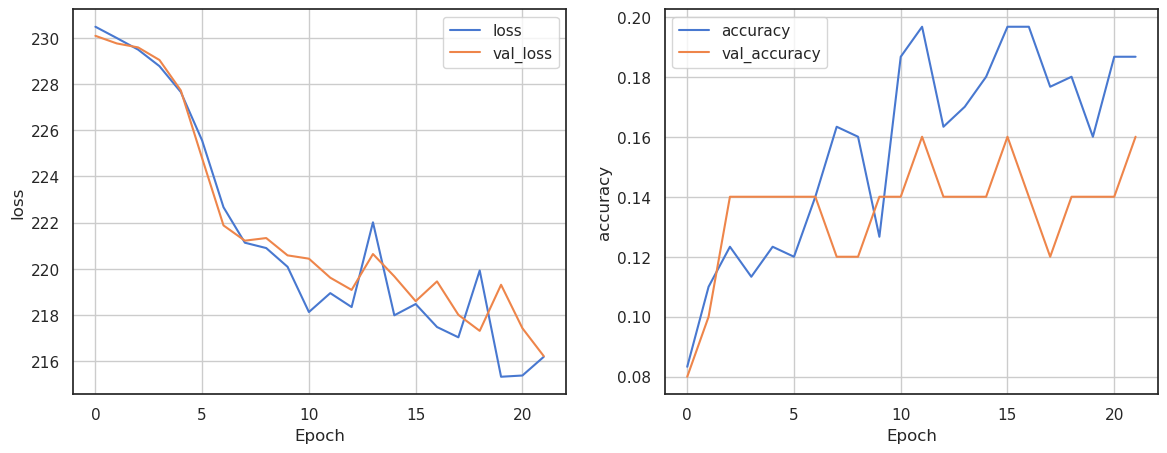

2023-08-30 12:30:28.855927: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:28.859827: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:28.863669: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:28.866783: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:28.869764: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:28.872533: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:28.875327: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:28.878900: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:28.882899: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:28

1/1 [==============================] - 0s 255ms/step - loss: 2.2237 - accuracy: 0.1600


{'loss': 2.223714828491211, 'accuracy': 0.1599999964237213}

1/1 [==============================] - 0s 130ms/step


2023-08-30 12:30:29.214742: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:29.268096: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:29.271831: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:29.272506: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:29.282897: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:29.283607: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:29.296377: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:29.297657: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:29.298410: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-08-30 12:30:29

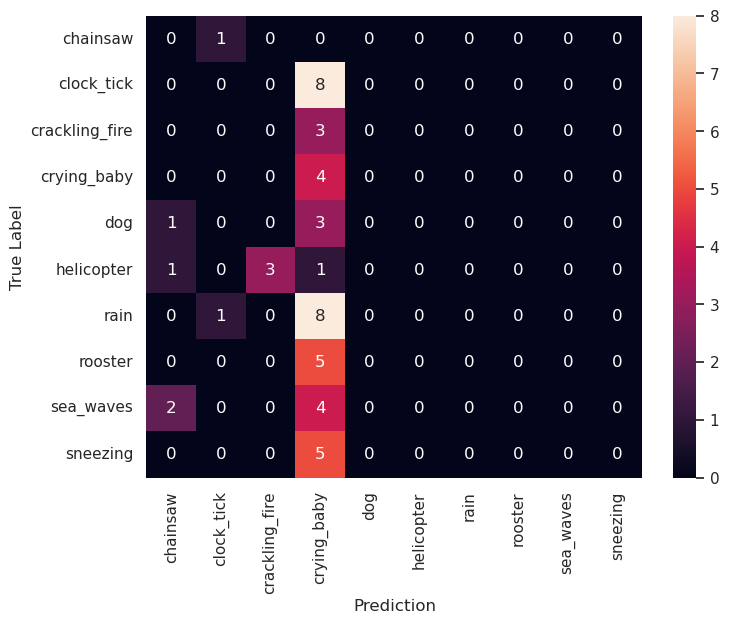

The most misclassified class is crying_baby
Audio category: crying_baby


The are more audio predicted as crying_baby then actually is:
Audio category misclassified as crying_baby: rain


In [28]:
seed = 42
tf.random.set_seed(seed)

path_to_ESC10 = os.path.join(main_dir,'Data', 'ESC-10-depth')

#create the dataset
batch_size = 80
preprocessing = None
train, val, test, label_names, INPUT_DIM, n_labels = create_dataset(path_to_ESC10,
                                                                      batch_size = batch_size,  # batch size
                                                                      preprocessing = preprocessing,
                                                                      verbose = 0,
                                                                      show_example_batch = True,
                                                                      ndim = 2,
                                                                      )

#build the model with the best parameters
model = build_model(n_labels = n_labels, compile = False, **best_params)
learning_rate = best_params['learning_rate']
epochs =  100
patience = 10
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate) if sys.platform == 'darwin' or in_colab else tf.keras.optimizers.Adam(learning_rate=learning_rate)
model, history, confusion_mtx, evaluation = compile_fit_evaluate(df_ESC10, model, train, val,test,label_names,
                                     epochs = epochs,
                                     patience = patience,
                                     loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                                     optimizer = optimizer,
                                     metrics = ['accuracy'],
                                     verbose = 0,
                                     show_history = True,
                                     show_test_evaluation = True,
                                     show_confusion_matrix = True,
                                     listen_to_wrong = True)

## 4.2 Classification on encoded spectrograms - RNN

In [ ]:
strong_pc = False

### Short Time Fourier Transform

#### Create dataset

Preprocessing: STFT
Resizing with shape: 64x128
The max value is 80.0
Audio shape: (30, 64, 128, 1)
Label shape: (30, 10)
Label: dog


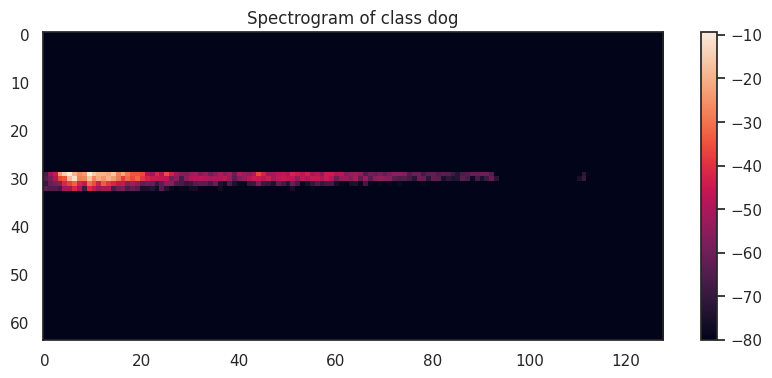

In [ ]:
batch_size = 30 if not strong_pc else 128
preprocessing = 'STFT'
n_dim = 3

dataset_STFT, label_STFT = create_dataset_lite(df_ESC10,
                                         batch_size = batch_size,
                                         preprocessing = preprocessing,
                                         ndim = n_dim,
                                         resize = True)

INPUT_DIM, n_labels = example_batch(dataset_STFT, label_names = list(label_STFT.columns),verbose=2, show_figure = True)

#### Load the encoders and build the model

We trained 2 AEs to produce a vectorial code. On these code we are going to train a RNN classifier.

In [ ]:
AE_STFT = 'AE_Conv_prep_flatten_STFT'

path_to_AE = os.path.join(main_dir, 'Saved_Models',AE_STFT)

#import the autencoder
autoencoder = load_model(path_to_AE)
encoder = autoencoder.layers[1]

# freeze the encoder
encoder.trainable = False
encoder.summary()

Classifier_name = 'encoder_classifier_flat_code_STFT'

Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 21, 42, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 14, 16)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                50208     
                                                                 
Total params: 50,368
Trainable params: 0
Non-trainable params: 50,368
_________________________________________________________________


In [ ]:
def build_model(
        encoder = encoder,
        INPUT_DIM = INPUT_DIM,
        n_labels = n_labels,
        n_units = 8,
        activation = 'tanh',
        n_hidden_layers = 1,
        #arguments to compile the model
        loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),
        learning_rate = 1e-3,
        metrics = ['accuracy'],
        verbose = 0,
        compile = True
):

    # Define Simple RNN  model
    classifier = tf.keras.Sequential(name = 'classifier')
    if n_hidden_layers>0:
        for i in range(1,n_hidden_layers):
            classifier.add(tf.keras.layers.GRU(units = n_units * (i+1), activation = activation, return_sequences = True if i < n_hidden_layers - 1 else False))
    classifier.add(tf.keras.layers.Flatten())
    classifier.add(tf.keras.layers.Dense(n_labels, activation='softmax', name = 'Final_dense'))

    # build the model with keras.Model
    inp = tf.keras.Input(shape = INPUT_DIM)
    code = encoder(inp)
    # add 1 dimension to the code
    code = tf.expand_dims(code, axis = 1)
    output = classifier(code)
    model = tf.keras.Model(inputs=inp, outputs=output, name = Classifier_name)

    # compile the autoencoder
    lr = learning_rate
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr) if sys.platform == 'darwin' or in_colab else tf.keras.optimizers.Adam(learning_rate = lr)

    if compile:
        # compile the model
        model.compile(loss = loss,
                      optimizer = optimizer,
                      metrics = metrics)
        if verbose > 0:
            display(model.summary())

    return model


In [ ]:
#model = build_model(encoder = encoder_list[0] , n_hidden_layers = 5 )
model = build_model( n_hidden_layers = 5 )

display(model.summary(line_length = 100))
display(model.layers[1].summary(line_length = 100))
display(model.layers[3].summary(line_length = 100))


Model: "encoder_classifier_flat_code_STFT"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_8 (InputLayer)                        [(None, 64, 128, 1)]                    0              
                                                                                                    
 Encoder (Sequential)                        (None, 32)                              50368          
                                                                                                    
 tf.expand_dims_7 (TFOpLambda)               (None, 1, 32)                           0              
                                                                                                    
 classifier (Sequential)                     (None, 10)                              20282          
                                                

None

Model: "Encoder"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 conv2d_1 (Conv2D)                           (None, 21, 42, 16)                      160            
                                                                                                    
 max_pooling2d_1 (MaxPooling2D)              (None, 7, 14, 16)                       0              
                                                                                                    
 flatten_1 (Flatten)                         (None, 1568)                            0              
                                                                                                    
 dense_2 (Dense)                             (None, 32)                              50208          
                                                                          

None

Model: "classifier"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 gru_14 (GRU)                                (None, 1, 16)                           2400           
                                                                                                    
 gru_15 (GRU)                                (None, 1, 24)                           3024           
                                                                                                    
 gru_16 (GRU)                                (None, 1, 32)                           5568           
                                                                                                    
 gru_17 (GRU)                                (None, 40)                              8880           
                                                                       

None

#### Run a Grid Search to find the best hyperparameters

In [ ]:
params = {'n_hidden_layers':[2,4]}
#params = {'learning_rate':[1e-2, 1e-3, 1e-4],'n_units':[8,32,128],'activation':['relu','elu','tanh'], 'n_hidden_layers':[1,2,3,4]}
epochs = 1 if not strong_pc else 100
patience = 10
verbose = 3
K_fold = 2#5

model_cv, result, best_params = K_fold_training(dataset_STFT,
                                                build_model,
                                                params = params,
                                                epochs = epochs,
                                                patience = patience,
                                                verbose = verbose,
                                                K=K_fold)



(400, 64, 128, 1)
(400, 10)
Fitting 2 folds for each of 2 candidates, totalling 4 fits
accuracy on test for this fold is 0.07
[CV 1/2] END n_hidden_layers=2; one_hot_accuracy: (test=0.070) total time=   3.8s
accuracy on test for this fold is 0.135
[CV 2/2] END n_hidden_layers=2; one_hot_accuracy: (test=0.135) total time=   5.3s
accuracy on test for this fold is 0.09
[CV 1/2] END n_hidden_layers=4; one_hot_accuracy: (test=0.090) total time=  10.9s
accuracy on test for this fold is 0.06
[CV 2/2] END n_hidden_layers=4; one_hot_accuracy: (test=0.060) total time=  10.8s
The best parameters are {'n_hidden_layers': 2}
The accuracy score are


mean_accuracy
{'n_hidden_layers': 2}         0.1025
{'n_hidden_layers': 4}         0.0750

#### Train the model

In [ ]:
tf.random.set_seed(seed)

path_to_ESC10 = os.path.join(main_dir,'Data', 'ESC-10-depth')

#create the dataset
batch_size = 30
preprocessing = 'STFT'
train, val, test, label_names, INPUT_DIM, n_labels = create_dataset(path_to_ESC10,
                                                                      batch_size = batch_size,  # batch size
                                                                      preprocessing = preprocessing,
                                                                      verbose = 0,
                                                                      show_example_batch = True,
                                                                      ndim = 3,
                                                                      resize = True
                                                                      )

Found 400 files belonging to 10 classes.
Using 300 files for training.
Using 100 files for validation.


Model: "encoder_classifier_flat_code_STFT"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 64, 128, 1)]      0         
                                                                 
 Encoder (Sequential)        (None, 32)                50368     
                                                                 
 tf.expand_dims_15 (TFOpLamb  (None, 1, 32)            0         
 da)                                                             
                                                                 
 classifier (Sequential)     (None, 10)                2570      
                                                                 
Total params: 52,938
Trainable params: 2,570
Non-trainable params: 50,368
_________________________________________________________________
Epoch 1/2
10/10 [==============================] - 18s 2s/step - loss: 2.3623 - accuracy: 0

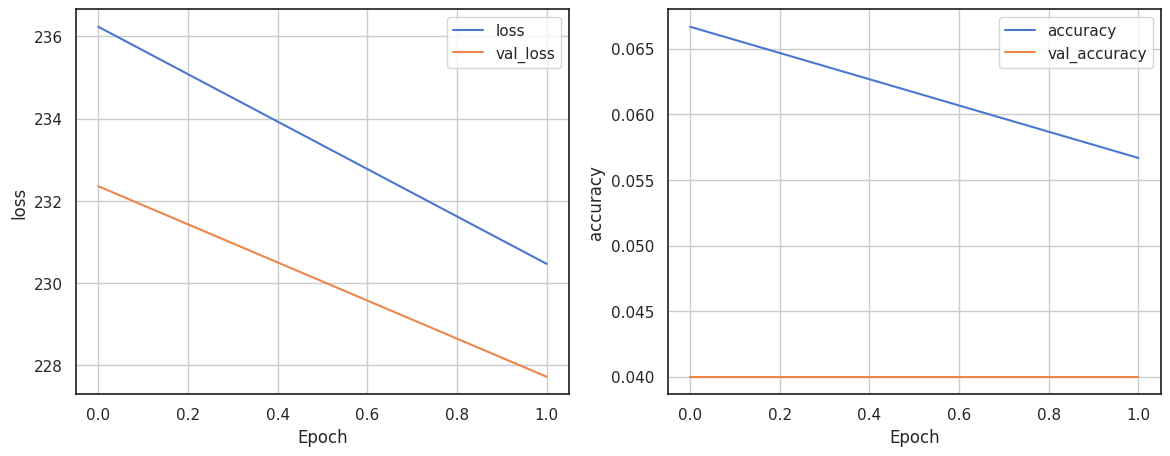

2/2 [==============================] - 2s 502ms/step - loss: 2.2979 - accuracy: 0.0600


{'loss': 2.2979094982147217, 'accuracy': 0.05999999865889549}

2/2 [==============================] - 0s 11ms/step


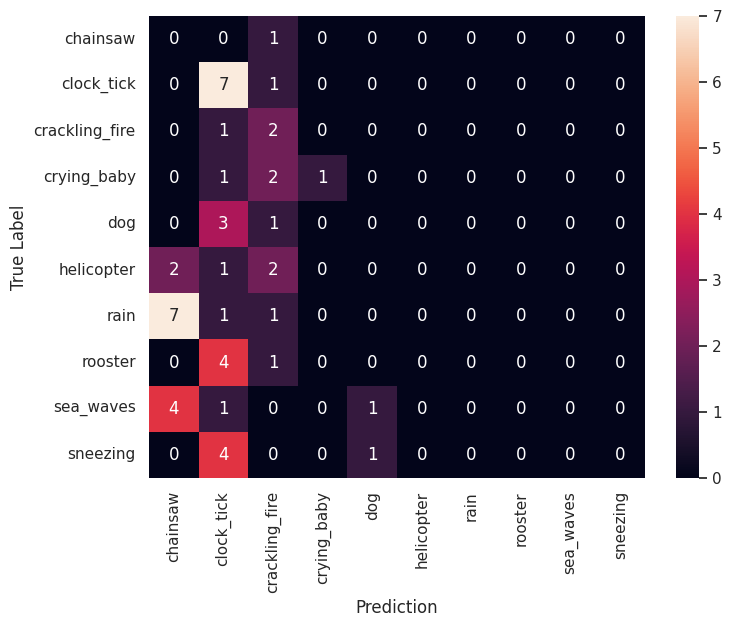

The most misclassified class is clock_tick
Audio category: clock_tick


The are more audio predicted as clock_tick then actually is:
Audio category misclassified as clock_tick: sneezing


In [ ]:
#build the model with the best parameters
model = build_model(n_labels = n_labels, compile = False, **best_params)
#learning_rate = best_params['learning_rate']
learning_rate = 1e-3
epochs =  2 if not strong_pc else 100
patience = 10
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate) if sys.platform == 'darwin' or in_colab else tf.keras.optimizers.Adam(learning_rate=learning_rate)
model, history, confusion_mtx, evaluation = compile_fit_evaluate(df_ESC10, model, train, val, test, label_names,
                                     epochs = epochs,
                                     patience = patience,
                                     loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                                     optimizer = optimizer,
                                     metrics = ['accuracy'],
                                     verbose = 1,
                                     show_history = True,
                                     show_test_evaluation = True,
                                     show_confusion_matrix = True,
                                     listen_to_wrong = True)

### Mel Frequency Cepstral Coefficients

#### Create the dataset

Preprocessing: MFCC
Resizing with shape: 64x128
The max value is 445.77911376953125
Audio shape: (30, 64, 128, 1)
Label shape: (30, 10)
Label: dog


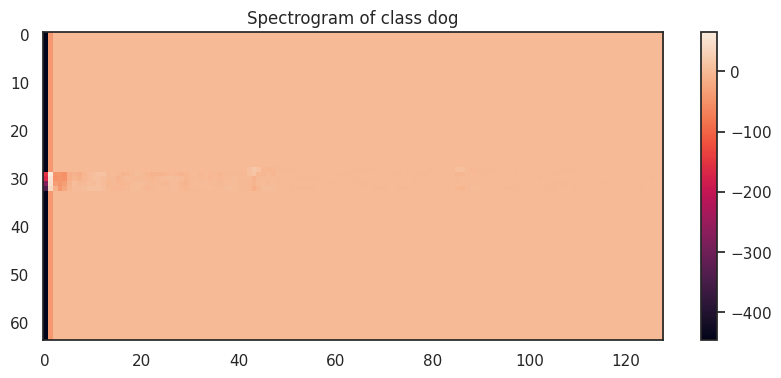

In [ ]:
batch_size = 30 if not strong_pc else 128
preprocessing = 'MFCC'
n_dim = 3

dataset_MFCC, label_MFCC = create_dataset_lite(df_ESC10,
                                         batch_size = batch_size,
                                         preprocessing = preprocessing,
                                         ndim = n_dim,
                                         resize = True)

INPUT_DIM, n_labels = example_batch(dataset_MFCC, label_names = list(label_MFCC.columns),verbose=2, show_figure = True)

#### Load the encoder and build the model

In [ ]:
AE_MFCC = 'AE_Conv_prep_flatten_MFCC'

path_to_AE = os.path.join(main_dir, 'Saved_Models',AE_MFCC)

#import the autencoder
autoencoder = load_model(path_to_AE)
encoder = autoencoder.layers[1]

# freeze the encoder
encoder.trainable = False
encoder.summary()

Classifier_name = 'encoder_classifier_flat_code_MFCC'

Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 64, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 11, 22, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 11, 32)         4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 2, 4, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 2, 48)          13872     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 48)         0   

In [ ]:
def build_model(
        encoder = encoder,
        INPUT_DIM = INPUT_DIM,
        n_labels = n_labels,
        n_units = 8,
        activation = 'tanh',
        n_hidden_layers = 1,
        #arguments to compile the model
        loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),
        learning_rate = 1e-3,
        metrics = ['accuracy'],
        verbose = 0,
        compile = True
):

    # Define Simple RNN  model
    classifier = tf.keras.Sequential(name = 'classifier')
    if n_hidden_layers>0:
        for i in range(1,n_hidden_layers):
            classifier.add(tf.keras.layers.GRU(units = n_units * (i+1), activation = activation, return_sequences = True if i < n_hidden_layers - 1 else False))
    classifier.add(tf.keras.layers.Flatten())
    classifier.add(tf.keras.layers.Dense(n_labels, activation='softmax', name = 'Final_dense'))

    # build the model with keras.Model
    inp = tf.keras.Input(shape = INPUT_DIM)
    code = encoder(inp)
    # add 1 dimension to the code
    code = tf.expand_dims(code, axis = 1)
    output = classifier(code)
    model = tf.keras.Model(inputs=inp, outputs=output, name = Classifier_name)

    # compile the autoencoder
    lr = learning_rate
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr) if sys.platform == 'darwin' or in_colab else tf.keras.optimizers.Adam(learning_rate = lr)

    if compile:
        # compile the model
        model.compile(loss = loss,
                      optimizer = optimizer,
                      metrics = metrics)
        if verbose > 0:
            display(model.summary())

    return model


In [ ]:
#model = build_model(encoder = encoder_list[0] , n_hidden_layers = 5 )
model = build_model( n_hidden_layers = 5 )

display(model.summary(line_length = 100))
display(model.layers[1].summary(line_length = 100))
display(model.layers[3].summary(line_length = 100))


Model: "encoder_classifier_flat_code_MFCC"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_17 (InputLayer)                       [(None, 64, 128, 1)]                    0              
                                                                                                    
 Encoder (Sequential)                        (None, 32)                              20240          
                                                                                                    
 tf.expand_dims_16 (TFOpLambda)              (None, 1, 32)                           0              
                                                                                                    
 classifier (Sequential)                     (None, 10)                              20282          
                                                

None

Model: "Encoder"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 conv2d_6 (Conv2D)                           (None, 32, 64, 16)                      160            
                                                                                                    
 max_pooling2d_6 (MaxPooling2D)              (None, 11, 22, 16)                      0              
                                                                                                    
 conv2d_7 (Conv2D)                           (None, 6, 11, 32)                       4640           
                                                                                                    
 max_pooling2d_7 (MaxPooling2D)              (None, 2, 4, 32)                        0              
                                                                          

None

Model: "classifier"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 gru_30 (GRU)                                (None, 1, 16)                           2400           
                                                                                                    
 gru_31 (GRU)                                (None, 1, 24)                           3024           
                                                                                                    
 gru_32 (GRU)                                (None, 1, 32)                           5568           
                                                                                                    
 gru_33 (GRU)                                (None, 40)                              8880           
                                                                       

None

#### Run a grid search to find the best params

In [ ]:
params = {'n_hidden_layers':[2,4]}
#params = {'learning_rate':[1e-2, 1e-3, 1e-4],'n_units':[8,32,128],'activation':['relu','elu','tanh'], 'n_hidden_layers':[1,2,3,4]}
epochs = 1 if not strong_pc else 100
patience = 10
verbose = 3
K_fold = 2#5

model_cv, result, best_params = K_fold_training(dataset_MFCC,
                                                build_model,
                                                params = params,
                                                epochs = epochs,
                                                patience = patience,
                                                verbose = verbose,
                                                K=K_fold)

(400, 64, 128, 1)
(400, 10)
Fitting 2 folds for each of 2 candidates, totalling 4 fits
accuracy on test for this fold is 0.075
[CV 1/2] END n_hidden_layers=2; one_hot_accuracy: (test=0.075) total time=   4.1s
accuracy on test for this fold is 0.105
[CV 2/2] END n_hidden_layers=2; one_hot_accuracy: (test=0.105) total time=   5.4s
accuracy on test for this fold is 0.145
[CV 1/2] END n_hidden_layers=4; one_hot_accuracy: (test=0.145) total time=  11.8s
accuracy on test for this fold is 0.155
[CV 2/2] END n_hidden_layers=4; one_hot_accuracy: (test=0.155) total time=  11.8s
The best parameters are {'n_hidden_layers': 4}
The accuracy score are


mean_accuracy
{'n_hidden_layers': 4}           0.15
{'n_hidden_layers': 2}           0.09

#### Train the model

In [ ]:
seed = 42
tf.random.set_seed(seed)

path_to_ESC10 = os.path.join(main_dir,'Data', 'ESC-10-depth')

#create the dataset
batch_size = 30 if not strong_pc else 128
preprocessing = 'MFCC'
train, val, test, label_names, INPUT_DIM, n_labels = create_dataset(path_to_ESC10,
                                                                      batch_size = batch_size,  # batch size
                                                                      preprocessing = preprocessing,
                                                                      verbose = 0,
                                                                      show_example_batch = True,
                                                                      ndim = 3,
                                                                      resize = True
                                                                      )


Found 400 files belonging to 10 classes.
Using 300 files for training.
Using 100 files for validation.


Model: "encoder_classifier_flat_code_MFCC"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 64, 128, 1)]      0         
                                                                 
 Encoder (Sequential)        (None, 32)                20240     
                                                                 
 tf.expand_dims_21 (TFOpLamb  (None, 1, 32)            0         
 da)                                                             
                                                                 
 classifier (Sequential)     (None, 10)                11322     
                                                                 
Total params: 31,562
Trainable params: 11,322
Non-trainable params: 20,240
_________________________________________________________________
Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


10/10 [==============================] - 10s 443ms/step - loss: 2.3031 - accuracy: 0.0900 - val_loss: 2.3021 - val_accuracy: 0.1200
Epoch 2/2
10/10 [==============================] - 0s 26ms/step - loss: 2.3026 - accuracy: 0.1100 - val_loss: 2.3011 - val_accuracy: 0.1200


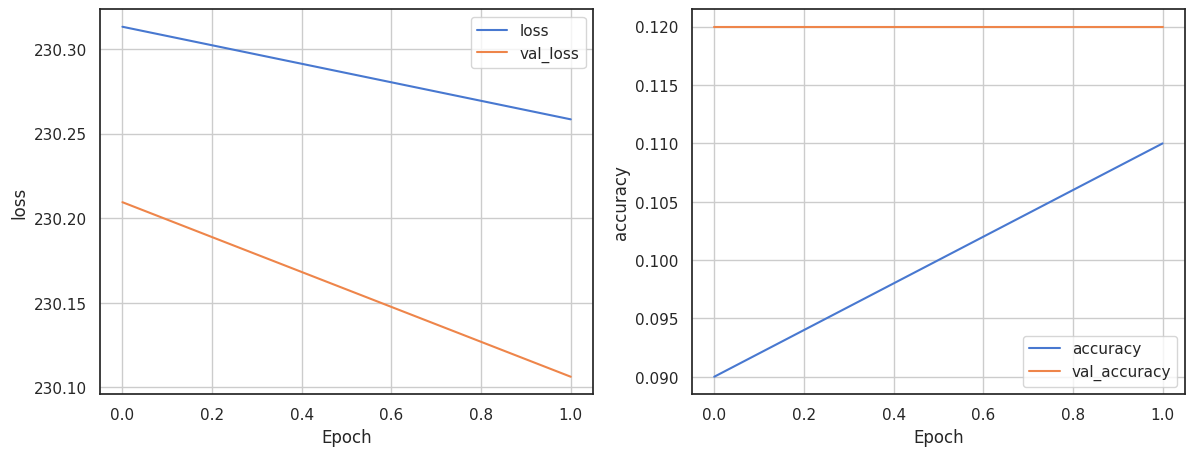

2/2 [==============================] - 4s 1s/step - loss: 2.3093 - accuracy: 0.0200


{'loss': 2.3093481063842773, 'accuracy': 0.019999999552965164}

2/2 [==============================] - 1s 14ms/step


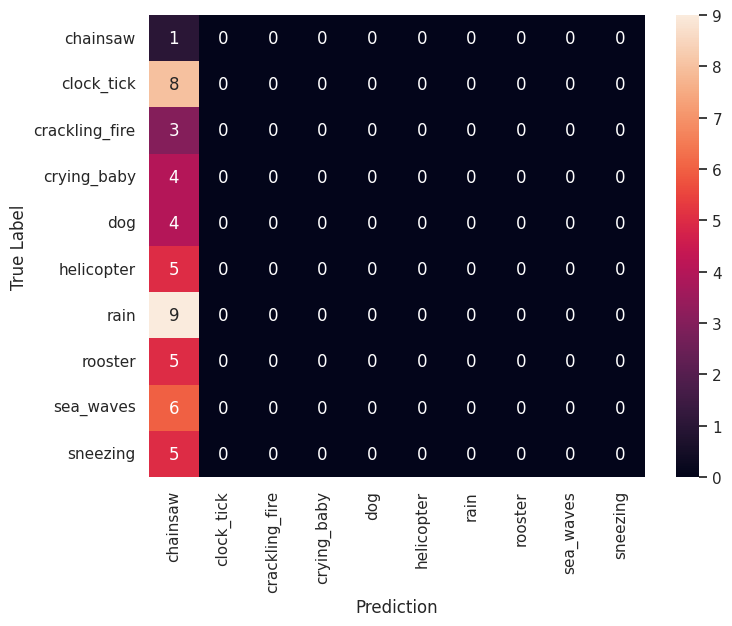

The most misclassified class is chainsaw
Audio category: chainsaw


The are more audio predicted as chainsaw then actually is:
Audio category misclassified as chainsaw: rain


In [ ]:

#build the model with the best parameters
model = build_model(n_labels = n_labels, compile = False, **best_params)
learning_rate = 1e-3
#learning_rate = best_params['learning_rate']
epochs =  2 if not strong_pc else 100
patience = 10
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate) if sys.platform == 'darwin' or in_colab else tf.keras.optimizers.Adam(learning_rate=learning_rate)
model, history, confusion_mtx, evaluation = compile_fit_evaluate(df_ESC10, model, train, val,test,label_names,
                                     epochs = epochs,
                                     patience = patience,
                                     loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                                     optimizer = optimizer,
                                     metrics = ['accuracy'],
                                     verbose = 1,
                                     show_history = True,
                                     show_test_evaluation = True,
                                     show_confusion_matrix = True,
                                     listen_to_wrong = True)

## 4.3 Classification on encoded spectrograms - CNN

Two out of five autoencoders produce a multichannel code, let's plot it before creating a classifiare for these new images.


### Short Time Fourier Transform

#### Create dataset

Preprocessing: STFT
Resizing with shape: 64x128
The max value is 80.0
Audio shape: (128, 64, 128, 1)
Label shape: (128, 10)
Label: crackling_fire


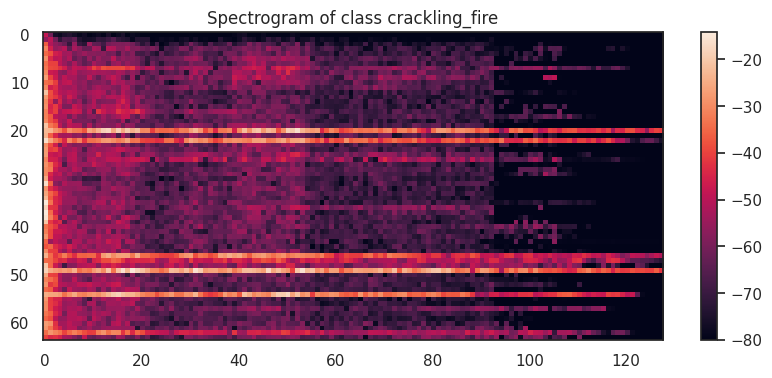

In [17]:
batch_size = 30 if not strong_pc else 128
preprocessing = 'STFT'
n_dim = 3

dataset_STFT, label_STFT = create_dataset_lite(df_ESC10,
                                         batch_size = batch_size,
                                         preprocessing = preprocessing,
                                         ndim = n_dim,
                                         resize = True)

INPUT_DIM, n_labels = example_batch(dataset_STFT, label_names = list(label_STFT.columns),verbose=2, show_figure = True)

#### Load the encoders and build the model

In [ ]:
AE_STFT = 'Fully_Convolutional_AE_STFT'

path_to_AE = os.path.join(main_dir, 'Saved_Models',AE_STFT)

#import the autencoder
autoencoder = tf.keras.models.load_model(path_to_AE, compile=False)
encoder = autoencoder.layers[1]

# freeze the encoder
encoder.trainable = False
encoder.summary()

Classifier_name = 'encoder_classifier_flat_code_STFT'

In [ ]:
def build_model(
        encoder = encoder,
        INPUT_DIM = INPUT_DIM,
        n_labels = n_labels,
        activation = 'tanh',
        n_layers = 2,
        n_units = 4,
        kernel_size = (3,3),
        strides = (2,2),
        max_pooling = (1,1),
        batch_norm = True,
        learning_rate = 1e-3,
        #arguments to compile the model
        loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),
        metrics = ['accuracy'],
        verbose = 0,
        compile = True
):

    # Define Simple RNN  model
    classifier = tf.keras.Sequential(name = 'Classifier')
    for i in range(n_layers):
        filters = n_units * (i+1)
        name = 'Conv_layer_'+str(i+1)
        classifier.add(tf.keras.layers.Conv2D(filters, kernel_size, strides = 2 ,activation=activation, padding='same', name = name ))
        name = 'Max_pooling_layer_'+str(i+1)
        classifier.add(layers.MaxPool2D(max_pooling, padding='same', name = name))

        if batch_norm:
            name = 'Batch_Norm_layer_'+str(i+1)
            classifier.add(layers.BatchNormalization(name = name))

    # Flatten the output of the previous layer
    classifier.add(tf.keras.layers.Flatten(name = 'Flatten_layer'))

    # Dense layer for classification
    classifier.add(tf.keras.layers.Dense(n_labels, activation='softmax', name = 'Final_dense'))

    # build the model with keras.Model
    inp = tf.keras.Input(shape = INPUT_DIM)
    code = encoder(inp)
    # add 1 dimension to the code
    output = classifier(code)
    model = tf.keras.Model(inputs=inp, outputs=output, name = Classifier_name)

    # compile the autoencoder
    lr = learning_rate
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr) if sys.platform == 'darwin' or in_colab else tf.keras.optimizers.Adam(learning_rate = lr)

    if compile:
        # compile the model
        model.compile(loss = loss,
                      optimizer = optimizer,
                      metrics = metrics)
        if verbose > 0:
            display(model.summary())

    return model


In [ ]:
#model = build_model(encoder = encoder_list[0] , n_hidden_layers = 5 )
model = build_model(kernel_size = (8,8))

display(model.summary(line_length = 100))
display(model.layers[1].summary(line_length = 100))
display(model.layers[2].summary(line_length = 100))


In [ ]:
tf.keras.utils.plot_model(
    model,
    expand_nested = True,
    show_shapes=True,
    dpi=100, # size of the image
)

#### Run a Grid Search to find the best hyperparameters

In [ ]:
strong_pc = False

In [12]:
params = {'n_layers':[2,4]}
#params = {'learning_rate':[1e-2, 1e-3, 1e-4],'n_units':[8,64],'activation':['relu','elu','tanh'], 'n_layers':[1,2,3,4], 'kernel_size':[(2,2),(3,3),(4,4)], 'strides':[(1,1),(2,2)]}

epochs = 1 if not strong_pc else 100
patience = 10
verbose = 3
K_fold = 2#5

model_cv, result, best_params = K_fold_training(dataset_STFT,
                                                build_model,
                                                params = params,
                                                epochs = epochs,
                                                patience = patience,
                                                verbose = verbose,
                                                K=K_fold)

#2160 fits with less then 10 seconds each on CPU ---> 5 hours on GPU?

(400, 64, 128, 1)
(400, 10)
Fitting 2 folds for each of 2 candidates, totalling 4 fits
accuracy on test for this fold is 0.095
[CV 1/2] END ......n_layers=2; one_hot_accuracy: (test=0.095) total time=   2.5s
accuracy on test for this fold is 0.15
[CV 2/2] END ......n_layers=2; one_hot_accuracy: (test=0.150) total time=   2.6s
accuracy on test for this fold is 0.105
[CV 1/2] END ......n_layers=4; one_hot_accuracy: (test=0.105) total time=   2.4s
accuracy on test for this fold is 0.11
[CV 2/2] END ......n_layers=4; one_hot_accuracy: (test=0.110) total time=   2.2s
The best parameters are {'n_layers': 2}
The accuracy score are


mean_accuracy
{'n_layers': 2}         0.1225
{'n_layers': 4}         0.1075

#### Train the model

Creating dataset from folder:  /content/drive/MyDrive/Human_Data_Analytics_Project_2023/Data/ESC-10-depth
Found 400 files belonging to 10 classes.
Using 300 files for training.
Using 100 files for validation.
label names: ['chainsaw' 'clock_tick' 'crackling_fire' 'crying_baby' 'dog' 'helicopter'
 'rain' 'rooster' 'sea_waves' 'sneezing']
The max value is 80.0
Caching the datasets...
Caching the dataset in memory
Caching the dataset in memory
Caching the dataset in memory
Saving the labels...
Showing example batch
Audio shape: (30, 64, 128, 1)
Label shape: (30, 10)
Label: clock_tick


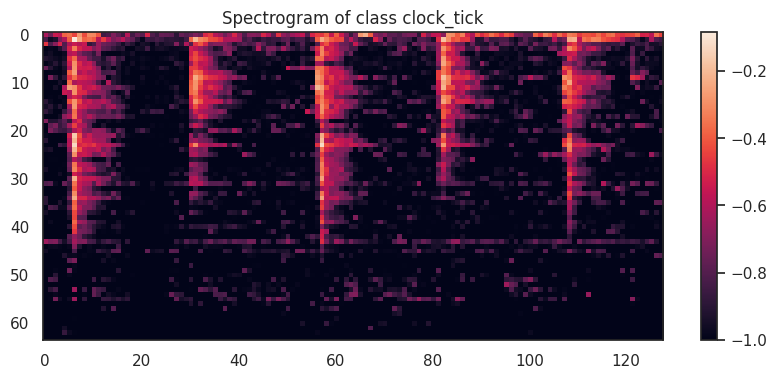

In [13]:
tf.random.set_seed(seed)

path_to_ESC10 = os.path.join(main_dir,'Data', 'ESC-10-depth')

#create the dataset
batch_size = 30
preprocessing = 'STFT'
train, val, test, label_names, INPUT_DIM, n_labels = create_dataset(path_to_ESC10,
                                                                      batch_size = batch_size,  # batch size
                                                                      preprocessing = preprocessing,
                                                                      verbose = 0,
                                                                      show_example_batch = True,
                                                                      ndim = 3,
                                                                      resize = True,
                                                                      transpose = False,
                                                                      )

Model: "encoder_classifier_flat_code_STFT"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 128, 1)]      0         
                                                                 
 Encoder (Sequential)        (None, 3, 7, 6)           8734      
                                                                 
 Classifier (Sequential)     (None, 10)                734       
                                                                 
Total params: 9,468
Trainable params: 710
Non-trainable params: 8,758
_________________________________________________________________
Epoch 1/2
10/10 [==============================] - 22s 2s/step - loss: 2.6523 - accuracy: 0.1567 - val_loss: 2.2237 - val_accuracy: 0.2600
Epoch 2/2
10/10 [==============================] - 0s 49ms/step - loss: 2.4091 - accuracy: 0.1767 - val_loss: 2.1516 - val_accuracy: 0.3000


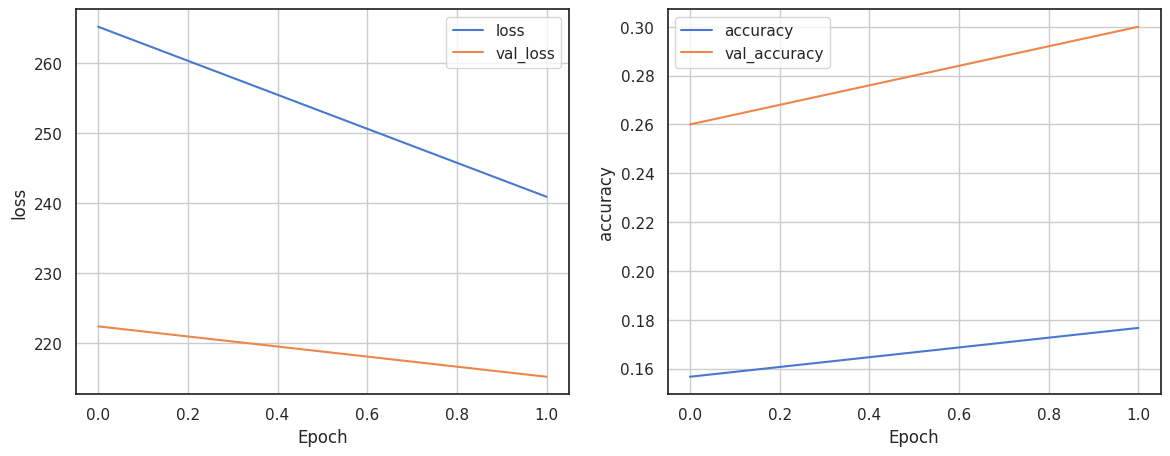

2/2 [==============================] - 2s 490ms/step - loss: 2.1054 - accuracy: 0.3000


{'loss': 2.105422019958496, 'accuracy': 0.30000001192092896}

2/2 [==============================] - 0s 33ms/step


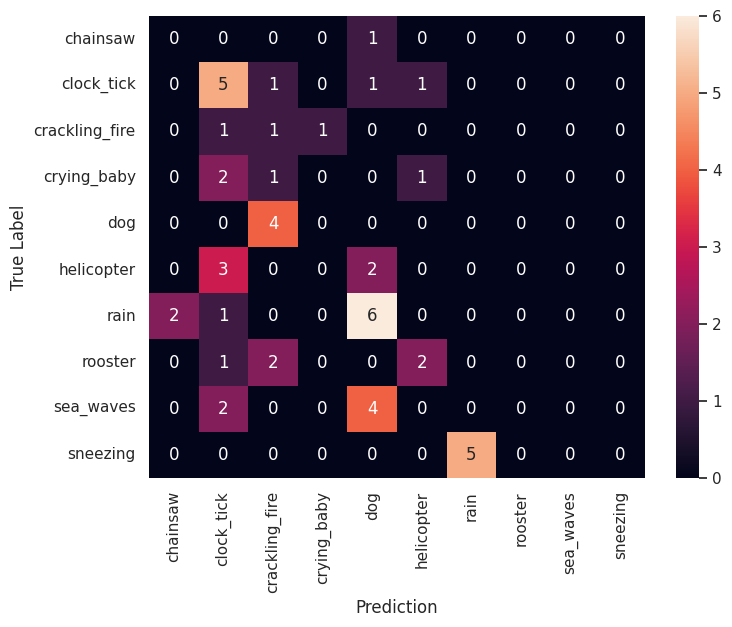

The most misclassified class is dog
Audio category: dog


The are more audio predicted as dog then actually is:
Audio category misclassified as dog: rain


In [14]:
#build the model with the best parameters
model = build_model(n_labels = n_labels, compile = False, **best_params)
#learning_rate = best_params['learning_rate']
learning_rate = 1e-3
epochs =  2 if not strong_pc else 100
patience = 10
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate) if sys.platform == 'darwin' or in_colab else tf.keras.optimizers.Adam(learning_rate=learning_rate)
model, history, confusion_mtx, evaluation = compile_fit_evaluate(df_ESC10, model, train, val, test, label_names,
                                     epochs = epochs,
                                     patience = patience,
                                     loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                                     optimizer = optimizer,
                                     metrics = ['accuracy'],
                                     verbose = 1,
                                     show_history = True,
                                     show_test_evaluation = True,
                                     show_confusion_matrix = True,
                                     listen_to_wrong = True)

### Mel Frequency Cepstral Coefficients

#### Create the dataset

Preprocessing: MFCC
Resizing with shape: 64x128
The max value is 445.77911376953125
Audio shape: (128, 64, 128, 1)
Label shape: (128, 10)
Label: dog


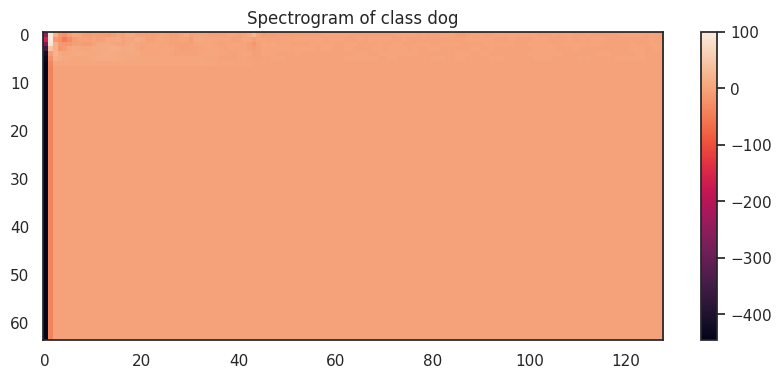

In [ ]:
batch_size = 30 if not strong_pc else 128
preprocessing = 'MFCC'
n_dim = 3

dataset_MFCC, label_MFCC = create_dataset_lite(df_ESC10,
                                         batch_size = batch_size,
                                         preprocessing = preprocessing,
                                         ndim = n_dim,
                                         resize = True)

INPUT_DIM, n_labels = example_batch(dataset_MFCC, label_names = list(label_MFCC.columns),verbose=2, show_figure = True)

#### Load the encoder and build the model

In [ ]:
AE_MFCC = 'Fully_Convolutional_AE_MFCC'

path_to_AE = os.path.join(main_dir, 'Saved_Models',AE_MFCC)

#import the autencoder
autoencoder = load_model(path_to_AE)
encoder = autoencoder.layers[1]

# freeze the encoder
encoder.trainable = False
encoder.summary()

Classifier_name = 'encoder_classifier_flat_code_MFCC'

Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 31, 63, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 15, 6)          870       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 7, 6)          0         
 2D)                                                             
                                                                 
Total params: 1,030
Trainable params: 0
Non-trainable params: 1,030
_________________________________________________________________


In [ ]:
def build_model(
        encoder = encoder,
        INPUT_DIM = INPUT_DIM,
        n_labels = n_labels,
        activation = 'tanh',
        n_layers = 2,
        n_units = 4,
        kernel_size = (3,3),
        strides = (2,2),
        max_pooling = (1,1),
        batch_norm = True,
        learning_rate = 1e-3,
        #arguments to compile the model
        loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),
        metrics = ['accuracy'],
        verbose = 0,
        compile = True
):

    # Define Simple RNN  model
    classifier = tf.keras.Sequential(name = 'Classifier')
    for i in range(n_layers):
        filters = n_units * (i+1)
        name = 'Conv_layer_'+str(i+1)
        classifier.add(tf.keras.layers.Conv2D(filters, kernel_size, strides = 2 ,activation=activation, padding='same', name = name ))
        name = 'Max_pooling_layer_'+str(i+1)
        classifier.add(layers.MaxPool2D(max_pooling, padding='same', name = name))

        if batch_norm:
            name = 'Batch_Norm_layer_'+str(i+1)
            classifier.add(layers.BatchNormalization(name = name))

    # Flatten the output of the previous layer
    classifier.add(tf.keras.layers.Flatten(name = 'Flatten_layer'))

    # Dense layer for classification
    classifier.add(tf.keras.layers.Dense(n_labels, activation='softmax', name = 'Final_dense'))

    # build the model with keras.Model
    inp = tf.keras.Input(shape = INPUT_DIM)
    code = encoder(inp)
    # add 1 dimension to the code
    output = classifier(code)
    model = tf.keras.Model(inputs=inp, outputs=output, name = Classifier_name)

    # compile the autoencoder
    lr = learning_rate
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr) if sys.platform == 'darwin' or in_colab else tf.keras.optimizers.Adam(learning_rate = lr)

    if compile:
        # compile the model
        model.compile(loss = loss,
                      optimizer = optimizer,
                      metrics = metrics)
        if verbose > 0:
            display(model.summary())

    return model


In [ ]:
#model = build_model(encoder = encoder_list[0] , n_hidden_layers = 5 )
model = build_model( n_layers = 4 )

display(model.summary(line_length = 100))
display(model.layers[1].summary(line_length = 100))
display(model.layers[2].summary(line_length = 100))


Model: "encoder_classifier_flat_code_MFCC"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_1 (InputLayer)                        [(None, 64, 128, 1)]                    0              
                                                                                                    
 Encoder (Sequential)                        (None, 3, 7, 6)                         1030           
                                                                                                    
 Classifier (Sequential)                     (None, 10)                              3466           
                                                                                                    
Total params: 4,496
Trainable params: 3,386
Non-trainable params: 1,110
_____________________________________________________________________________

None

Model: "Encoder"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 conv2d_4 (Conv2D)                           (None, 31, 63, 16)                      160            
                                                                                                    
 max_pooling2d_4 (MaxPooling2D)              (None, 15, 31, 16)                      0              
                                                                                                    
 conv2d_5 (Conv2D)                           (None, 7, 15, 6)                        870            
                                                                                                    
 max_pooling2d_5 (MaxPooling2D)              (None, 3, 7, 6)                         0              
                                                                          

None

Model: "Classifier"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 Conv_layer_1 (Conv2D)                       (None, 2, 4, 4)                         220            
                                                                                                    
 Max_pooling_layer_1 (MaxPooling2D)          (None, 2, 4, 4)                         0              
                                                                                                    
 Batch_Norm_layer_1 (BatchNormalization)     (None, 2, 4, 4)                         16             
                                                                                                    
 Conv_layer_2 (Conv2D)                       (None, 1, 2, 8)                         296            
                                                                       

None

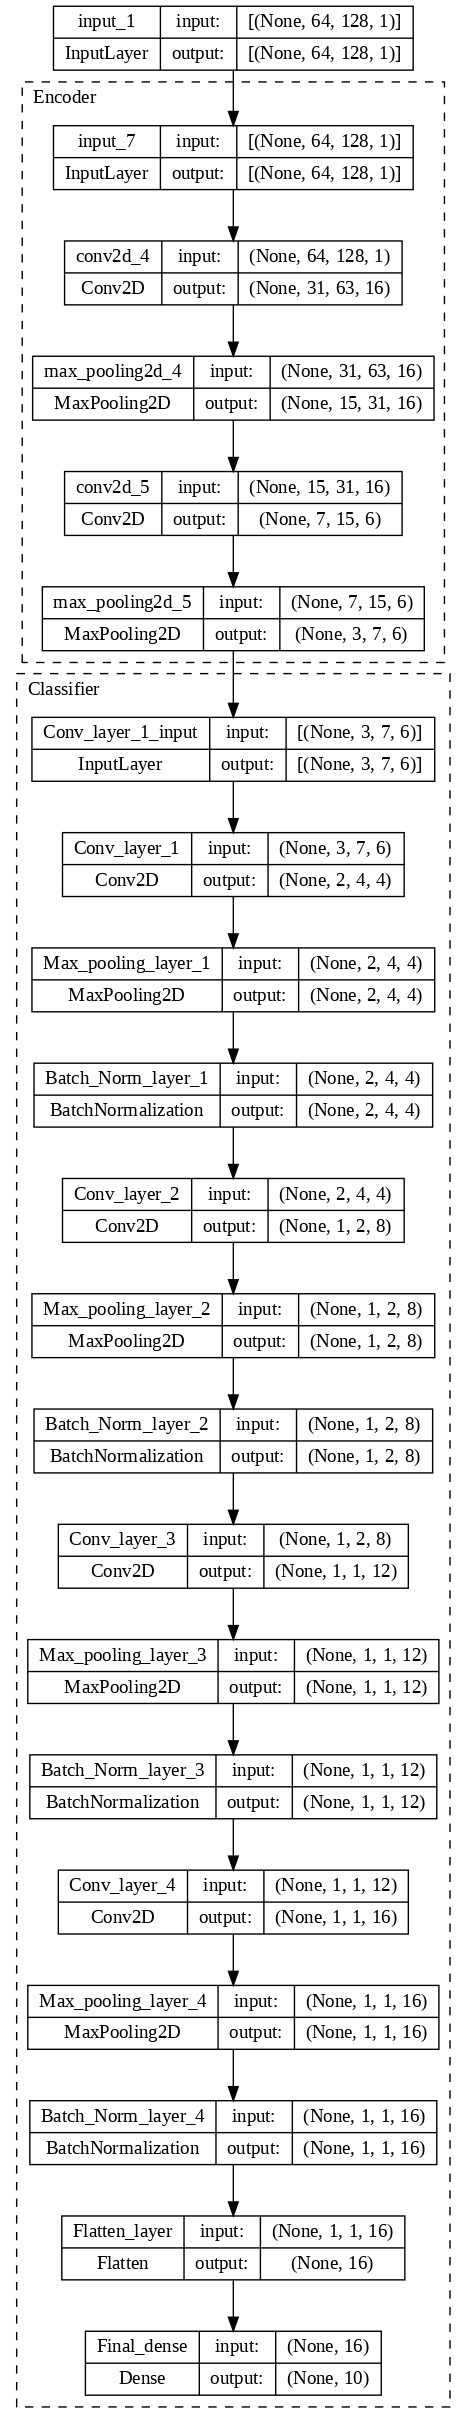

In [ ]:
tf.keras.utils.plot_model(
    model,
    expand_nested = True,
    show_shapes=True,
    dpi=100, # size of the image
)

#### Run a grid search to find the best params

In [ ]:
strong_pc = False

In [ ]:
params = {'n_layers':[2,4]}
#params = {'learning_rate':[1e-2, 1e-3, 1e-4],'n_units':[8,64],'activation':['relu','elu','tanh'], 'n_layers':[1,2,3,4], 'kernel_size':[(2,2),(3,3),(4,4)], 'strides':[(1,1),(2,2)]}

epochs = 1 if not strong_pc else 100
patience = 10
verbose = 3
K_fold = 2#5

model_cv, result, best_params = K_fold_training(dataset_MFCC,
                                                build_model,
                                                params = params,
                                                epochs = epochs,
                                                patience = patience,
                                                verbose = verbose,
                                                K=K_fold)

(400, 64, 128, 1)
(400, 10)
Fitting 2 folds for each of 2 candidates, totalling 4 fits
accuracy on test for this fold is 0.09
[CV 1/2] END ......n_layers=2; one_hot_accuracy: (test=0.090) total time=   2.7s
accuracy on test for this fold is 0.075
[CV 2/2] END ......n_layers=2; one_hot_accuracy: (test=0.075) total time=   1.4s
accuracy on test for this fold is 0.09
[CV 1/2] END ......n_layers=4; one_hot_accuracy: (test=0.090) total time=   1.6s
accuracy on test for this fold is 0.12
[CV 2/2] END ......n_layers=4; one_hot_accuracy: (test=0.120) total time=   2.6s
The best parameters are {'n_layers': 4}
The accuracy score are


mean_accuracy
{'n_layers': 4}         0.1050
{'n_layers': 2}         0.0825

#### Train the model

In [ ]:
seed = 42
tf.random.set_seed(seed)

path_to_ESC10 = os.path.join(main_dir,'Data', 'ESC-10-depth')

#create the dataset
batch_size = 30 if not strong_pc else 128
preprocessing = 'MFCC'
train, val, test, label_names, INPUT_DIM, n_labels = create_dataset(path_to_ESC10,
                                                                      batch_size = batch_size,  # batch size
                                                                      preprocessing = preprocessing,
                                                                      verbose = 0,
                                                                      show_example_batch = True,
                                                                      ndim = 3,
                                                                      resize = True
                                                                      )


Found 400 files belonging to 10 classes.
Using 300 files for training.
Using 100 files for validation.


In [ ]:
#build the model with the best parameters
model = build_model(n_labels = n_labels, compile = False, **best_params)
learning_rate = 1e-3
#learning_rate = best_params['learning_rate']
epochs =  2 if not strong_pc else 100
patience = 10
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate) if sys.platform == 'darwin' or in_colab else tf.keras.optimizers.Adam(learning_rate=learning_rate)
model, history, confusion_mtx, evaluation = compile_fit_evaluate(df_ESC10, model, train, val,test,label_names,
                                     epochs = epochs,
                                     patience = patience,
                                     loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                                     optimizer = optimizer,
                                     metrics = ['accuracy'],
                                     verbose = 1,
                                     show_history = True,
                                     show_test_evaluation = True,
                                     show_confusion_matrix = True,
                                     listen_to_wrong = True)

TypeError: ignored

# THE BEST MODEL - 50 classes

In [ ]:
bla bla bla